<a href="https://colab.research.google.com/github/syedhamad/Endoscropic-Image-Segmentation/blob/main/resnet_unet_tiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# installing h5py version 2.10 that is compatible with segmentation model library
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 4.1 MB/s 
     |████████████████████████████████| 15.7 MB 191 kB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
tensorflow 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
google-co

In [3]:
# installing the required libraries
!pip install segmentation-models

     |████████████████████████████████| 50 kB 5.7 MB/s 


In [4]:
!pip install git+https://github.com/mjkvaak/ImageDataAugmentor

  Cloning https://github.com/mjkvaak/ImageDataAugmentor to /tmp/pip-req-build-2jn3w85s
  Running command git clone -q https://github.com/mjkvaak/ImageDataAugmentor /tmp/pip-req-build-2jn3w85s
     |████████████████████████████████| 49.9 MB 17 kB/s 
     |████████████████████████████████| 631 kB 51.0 MB/s 
  Created wheel for ImageDataAugmentor: filename=ImageDataAugmentor-0.0.0-py3-none-any.whl size=29576 sha256=f361ba8b2a990cb8593695aa378f389dd923c022769b1ed66194598a45e8bddd
  Stored in directory: /tmp/pip-ephem-wheel-cache-ztntppyx/wheels/c9/bd/73/9cfa59d2393dae55bbcc30f5aa901f55fe531c66efebbc8fc3
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654020 sha256=8fd262cd6728a498f8a48525c253daaca7059741ca998238721cce1bc529c899
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built ImageDataAugmentor imgaug
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2

In [5]:
!pip install --upgrade albumentations

     |████████████████████████████████| 98 kB 2.9 MB/s 
     |████████████████████████████████| 37.1 MB 43 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [6]:
# importing the necessary libraries
import tensorflow as tf
import segmentation_models as sm
from ImageDataAugmentor.image_data_augmentor import *
import albumentations as A
import cv2
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU
from tifffile import imread
sm.set_framework('tf.keras')

sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [9]:
# Reading the training images
train_images = []
masks_images = [] 

d = r"/content/drive/MyDrive/ead/Dataset/images/train"
m = r"/content/drive/MyDrive/ead/Dataset/masks/train"
for directory_path in glob.glob(d):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = (img/255.0).astype(np.float32)
        train_images.append(img)
        
        n = os.path.basename(img_path)
        mask_file = os.path.join(m, os.path.splitext(n)[0]+'.tif')
        masks_images.append(mask_file)

In [10]:
# reading the original masks
train_masks = [] 

for mask_path in masks_images:
  mask = imread(mask_path, 0)
  train_masks.append(mask)

In [11]:
# Reading the training images
val_images = []
masks_images = [] 

d = r"/content/drive/MyDrive/ead/Dataset/images/val"
m = r"/content/drive/MyDrive/ead/Dataset/masks/val"

for directory_path in glob.glob(d):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = (img/255.0).astype(np.float32)
        val_images.append(img)
        
        n = os.path.basename(img_path)
        mask_file = os.path.join(m, os.path.splitext(n)[0]+'.tif')
        masks_images.append(mask_file)

In [12]:
# reading the original masks
val_masks = [] 

for mask_path in masks_images:
  mask = imread(mask_path, 0)
  val_masks.append(mask)

In [13]:
# Reading the training images
test_images = []
masks_images = [] 

d = r"/content/drive/MyDrive/ead/Dataset/images/test"
m = r"/content/drive/MyDrive/ead/Dataset/masks/test"

for directory_path in glob.glob(d):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = (img/255.0).astype(np.float32)
        test_images.append(img)
        
        n = os.path.basename(img_path)
        mask_file = os.path.join(m, os.path.splitext(n)[0]+'.tif')
        masks_images.append(mask_file)

In [14]:
# reading the original masks
test_masks = [] 

for mask_path in masks_images:
  mask = imread(mask_path, 0)
  test_masks.append(mask)

In [15]:
train_images = np.array(train_images, dtype=np.float32)
train_masks = np.array(train_masks, dtype=np.uint8)

In [16]:
val_images = np.array(val_images, dtype=np.float32)
val_masks = np.array(val_masks, dtype=np.uint8)

In [17]:
test_images = np.array(test_images, dtype=np.float32)
test_masks = np.array(test_masks, dtype=np.uint8)

In [18]:
train_masks[train_masks==255] = 1
np.unique(train_masks)

array([0, 1], dtype=uint8)

In [19]:
val_masks[val_masks==255] = 1
np.unique(val_masks)

array([0, 1], dtype=uint8)

In [20]:
test_masks[test_masks==255] = 1
np.unique(test_masks)

array([0, 1], dtype=uint8)

In [21]:
train_masks = np.moveaxis(train_masks, 1, -1)
val_masks = np.moveaxis(val_masks, 1, -1)
test_masks = np.moveaxis(test_masks, 1, -1)
print(train_masks.shape)
print(val_masks.shape)
print(test_masks.shape)

(2303, 256, 256, 5)
(70, 256, 256, 5)
(72, 256, 256, 5)


In [22]:
p = np.random.permutation(len(train_images))

train_images_s = train_images[p]
train_masks_s = train_masks[p]

In [23]:
p = np.random.permutation(len(val_images))

val_images_s = val_images[p]
val_masks_s = val_masks[p]

In [24]:
p = np.random.permutation(len(test_images))

test_images_s = test_images[p]
test_masks_s = test_masks[p]

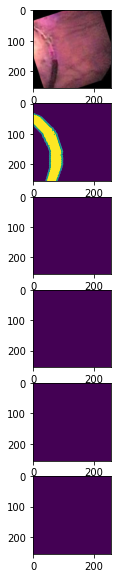

In [25]:
# plotting
plt.figure(figsize=(10,10))
plt.subplot(611)
plt.imshow(train_images_s[5, :,:].astype(np.float32))
for i in range(5):
  plt.subplot("61{}".format(i+2))
  plt.imshow(train_masks_s[5][:,:, i])

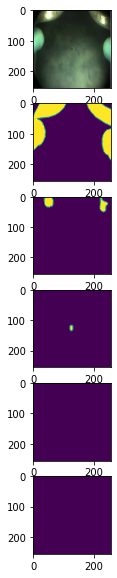

In [26]:
# plotting
plt.figure(figsize=(10,10))
plt.subplot(611)
plt.imshow(val_images_s[50, :,:].astype(np.float32))
for i in range(5):
  plt.subplot("61{}".format(i+2))
  plt.imshow(val_masks_s[50][:,:, i])

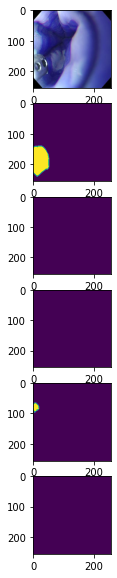

In [27]:
# plotting
plt.figure(figsize=(10,10))
plt.subplot(611)
plt.imshow(test_images_s[0, :,:].astype(np.float32))
for i in range(5):
  plt.subplot("61{}".format(i+2))
  plt.imshow(test_masks_s[0][:,:, i])

In [28]:
del train_images
del train_masks
del val_images
del val_masks
del test_images
del test_masks

In [29]:
# AUGMENTATIONS = A.Compose([
#         A.VerticalFlip(p=0.5),
#         A.Rotate(limit=[-90, 90], interpolation=cv2.INTER_NEAREST, border_mode=cv2.BORDER_CONSTANT, value=0,
#                 mask_value=0, p=0.5),
#         A.HorizontalFlip(p=0.5),
#         A.Transpose(p=0.5)])


# augment=AUGMENTATIONS, in imageDataAugmentor

In [30]:
b = 8

BACKBONE = 'resnet34'

preprocess_input = sm.get_preprocessing(BACKBONE)

train_datagen = ImageDataAugmentor(input_augment_mode='image', label_augment_mode="mask", preprocess_input=preprocess_input)
train_generator = train_datagen.flow(train_images_s, train_masks_s, batch_size=b, shuffle=True)

val_datagen = ImageDataAugmentor(input_augment_mode='image', label_augment_mode="mask", preprocess_input=preprocess_input)
val_generator = val_datagen.flow(val_images_s, val_masks_s, batch_size=b, shuffle=True)

test_datagen = ImageDataAugmentor(input_augment_mode='image', label_augment_mode="mask", preprocess_input=preprocess_input)
test_generator = test_datagen.flow(test_images_s, test_masks_s, batch_size=b, shuffle=True)

In [31]:
# initializing the acitivation function, learning rate and optimizer
n_classes=5
activation='sigmoid'

LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

In [33]:
# defining the loss
dice_loss = sm.losses.DiceLoss(per_image=True)
focal_loss = sm.losses.BinaryFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# bce_jaccard_loss = sm.losses.binary_crossentropy + sm.losses.jaccard_loss

In [34]:
# defining the metrics
metrics = [sm.metrics.IOUScore(threshold=0.5, per_image=True), sm.metrics.FScore(beta=1, threshold=0.5, per_image=True), sm.metrics.FScore(beta=2, threshold=0.5, per_image=True)]

In [35]:
callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='val_iou_score', patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/ead/my_model.h5', monitor='val_loss',save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_iou_score', factor=0.1,patience=10)
    ]

In [36]:
# defining backbone

# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation=activation, encoder_freeze=True)

# compile keras model with defined optimozer, loss and metrics
model.compile(optim, total_loss, metrics=metrics)

print(model.summary())

85532672/85521592 [==============================] - 4s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d[0][0]             
___________________________

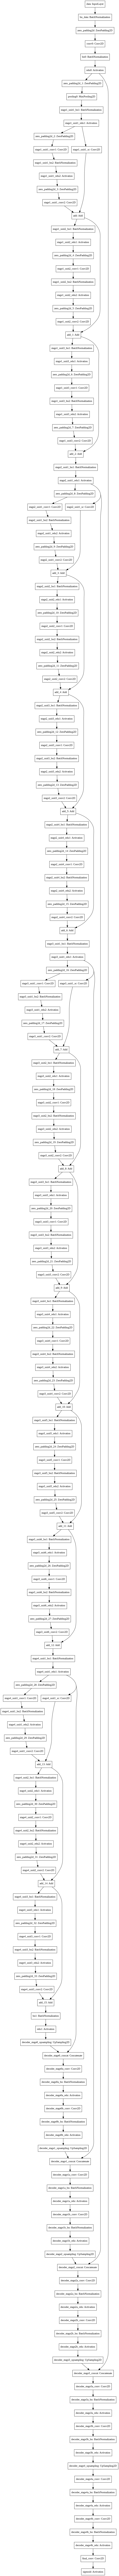

In [37]:
# plotting our model
tf.keras.utils.plot_model(model)

In [ ]:
# Training our model
steps_per_epoch = len(train_images_s)//b
validation_steps = len(val_images_s)//b


history1 = model.fit(train_generator, validation_data=val_generator, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_steps=validation_steps, epochs=80,
                    verbose=1)

Epoch 1/80
287/287 [==============================] - 137s 353ms/step - loss: 1.0155 - iou_score: 0.0807 - f1-score: 0.0968 - f2-score: 0.1004 - val_loss: 0.9858 - val_iou_score: 0.4375 - val_f1-score: 0.4375 - val_f2-score: 0.4375
Epoch 2/80
287/287 [==============================] - 97s 339ms/step - loss: 0.9628 - iou_score: 0.2138 - f1-score: 0.2406 - f2-score: 0.2408 - val_loss: 0.9760 - val_iou_score: 0.5752 - val_f1-score: 0.5779 - val_f2-score: 0.5773
Epoch 3/80
287/287 [==============================] - 97s 338ms/step - loss: 0.9418 - iou_score: 0.2636 - f1-score: 0.2959 - f2-score: 0.3005 - val_loss: 0.9449 - val_iou_score: 0.4617 - val_f1-score: 0.4846 - val_f2-score: 0.4766
Epoch 4/80
287/287 [==============================] - 98s 340ms/step - loss: 0.9238 - iou_score: 0.2943 - f1-score: 0.3287 - f2-score: 0.3344 - val_loss: 0.8797 - val_iou_score: 0.4035 - val_f1-score: 0.4457 - val_f2-score: 0.4431
Epoch 5/80
287/287 [==============================] - 97s 338ms/step - loss

In [ ]:
# Plotting Training and Validation Loss
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training and Validation IOU
acc = history1.history['iou_score']
val_acc = history1.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IOU')
plt.plot(epochs, val_acc, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [ ]:
# saving our model
model.save('/content/drive/MyDrive/ead/model.hdf5')
model.save_weights('/content/drive/MyDrive/ead/weights_g.h5')
model_json = model.to_json()
with open('/content/drive/MyDrive/ead/model.json', "w") as json_file:
    json_file.write(model_json)
json_file.close()

In [ ]:
steps = len(test_images_s) // b
model.evaluate(test_generator, batch_size=b, steps=steps)

In [ ]:
import random
from tensorflow.keras.models import load_model
model1 = load_model('/content/drive/MyDrive/ead/my_model.h5', compile=False)

In [ ]:
test_img_number = random.randint(0, len(test_images_s))
test_img = test_images_s[test_img_number]
ground_truth=test_masks_s[test_img_number]
test_img_input=np.expand_dims(test_img, 0)


test_pred1 = model1.predict(test_img_input)
test_prediction1 = np.argmax(test_pred1, axis=3)[0,:,:]



plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0])
plt.show()

In [ ]:
plt.figure(figsize=(25, 8))
for i in range(5):
  plt.subplot(f"15{i+1}")
  plt.imshow(ground_truth[:,:,i])

In [ ]:
test_pred1 = test_pred1.reshape(1*256,256,5)
plt.figure(figsize=(25, 8))
for i in range(5):
  plt.subplot(f"15{i+1}")
  plt.imshow(test_pred1[:,:,i])